COMPANY: COCA-COLA(1999-2025)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data : nifty 50

1.Classification using KNN

- In this , we will try to find in which stocks there is positive change or in which there is negative change , so those having positive change will classify as good stock otherwise negative

In [25]:
data = pd.read_csv("/content/KO_1919-09-06_2025-01-31[1].csv")
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
15872,2025-01-24,61.720001,62.009998,61.439999,61.919998,61.919998,19244600
15873,2025-01-27,62.869999,64.180000,62.470001,63.869999,63.869999,20742900
15874,2025-01-28,63.509998,64.040001,62.279999,62.360001,62.360001,14956000
15875,2025-01-29,62.560001,63.360001,62.549999,62.830002,62.830002,11325600
15876,2025-01-30,63.849998,64.290001,63.230000,64.050003,64.050003,13185300


close price trend

Text(0, 0.5, 'closingprice')

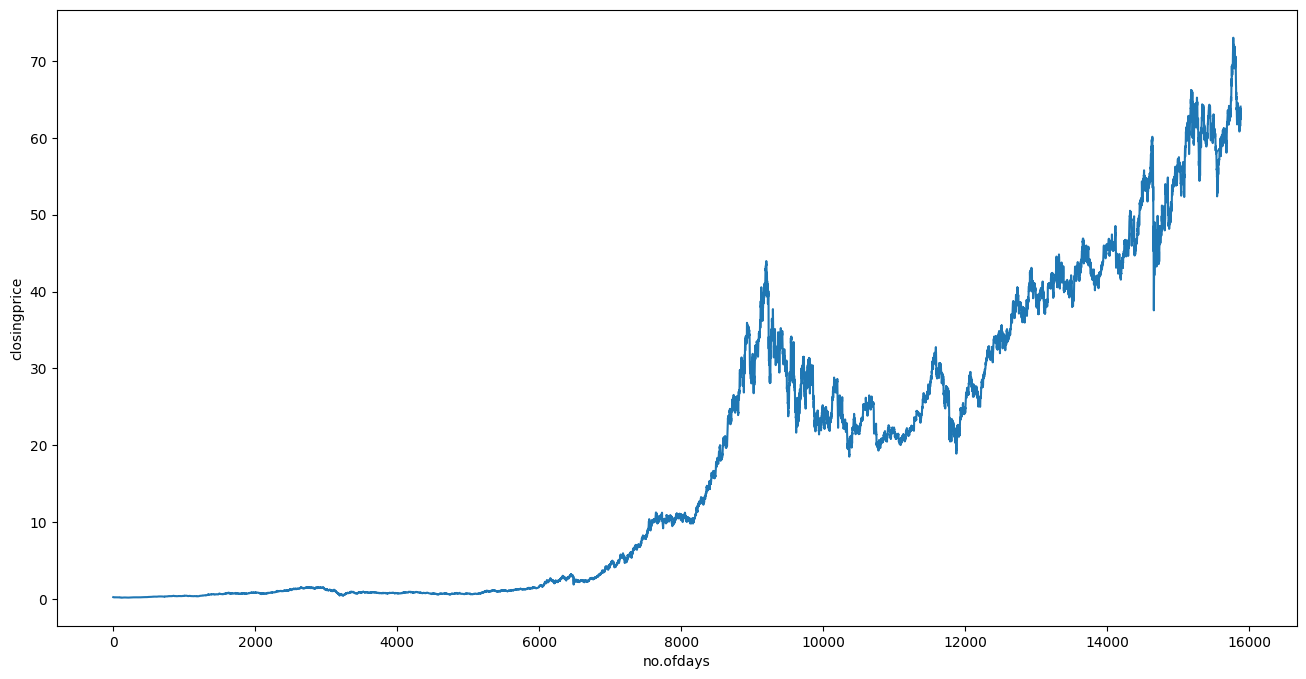

In [26]:
plt.figure(figsize=(16,8))
plt.plot(data["Close"],label='Closing Price')
plt.xlabel("no.ofdays")
plt.ylabel("closingprice")

In [30]:
data['Open -  Close'] = data['Open'] - data['Close']
data['High -  Low'] = data['High'] - data['Low']
data = data.dropna()


Required data to predict whether  to buy or sell the data

In [31]:
X = data[['Open -  Close', 'High -  Low']]

In [32]:
X.head()

,Open - Close,High - Low
0,0.000000,0.007161
1,0.001954,0.005860
2,-0.001302,0.003255
3,0.005860,0.009766
4,0.000651,0.005534


Intention is to store 1 for the buy and 0 for the sell on the closing price .
 the target variable is "y" for the classification purpose

In [36]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1,0)
y

array([0, 1, 0, ..., 1, 1, 0])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 45)

KNN CLassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

finding best parameter

In [44]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)

In [45]:
accuracy_score(y_test,model_pred)

0.5075566750629723

In [46]:
Pred_test = model.predict(x_test)
Pred_test

array([1, 1, 0, ..., 0, 0, 0])

In [51]:
actual_pred_data = pd.DataFrame({'Actual':y_test,'Predicted':Pred_test})
actual_pred_data.head(10)

,Actual,Predicted
0,1,1
1,0,1
2,0,0
3,1,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


2. Using Knn regression to predict closing price

In [54]:
y= data['Close']
y

,Close
0,0.263021
1,0.257161
2,0.259115
3,0.253255
4,0.250651
...,...
15872,61.919998
15873,63.869999
15874,62.360001
15875,62.830002


In [55]:
X

,Open - Close,High - Low
0,0.000000,0.007161
1,0.001954,0.005860
2,-0.001302,0.003255
3,0.005860,0.009766
4,0.000651,0.005534
...,...,...
15872,-0.199997,0.570000
15873,-1.000000,1.709999
15874,1.149998,1.760002
15875,-0.270000,0.810001


       model
       independent variable = (close-open, high-low)
       dependent variable = ( close price)


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_r,x_test_r,y_train_r,y_test_r = train_test_split(X,y,test_size = 0.34)

# gridsearchCV is used for hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}
knn = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn, params,cv =5)

model_reg.fit(x_train_r,y_train_r)
model_reg_pred = model_reg.predict(x_test_r)
print(model_reg_pred)

[43.56239573 38.02041658 39.92708333 ... 35.95625003 38.42302052
 49.14322885]


checking rmse error for accuracy check

In [64]:
rms = np.sqrt(np.mean(np.power((np.array(y_test_r)-np.array(model_reg_pred)),2)))
rms

9.12570821714884

In [69]:
valid = pd.DataFrame({'Actual Close': y_test_r, 'Predicted Close': model_reg_pred, 'Date': data['Date'][y_test_r.index]})
valid.sample(10)

,Actual Close,Predicted Close,Date
6078,2.135417,5.014974,1986-03-12
6471,3.023438,3.054471,1987-09-30
2638,1.513021,1.209961,1972-07-27
9700,28.093750,49.785833,2000-07-11
1934,0.822917,0.952257,1969-10-16
6035,1.697917,2.694227,1986-01-09
11907,21.465000,28.793541,2009-04-22
15391,60.090000,37.190000,2023-02-23
13823,41.150002,27.754583,2016-11-29
13465,39.230000,32.401042,2015-06-30


Text(0.5, 0, 'price')

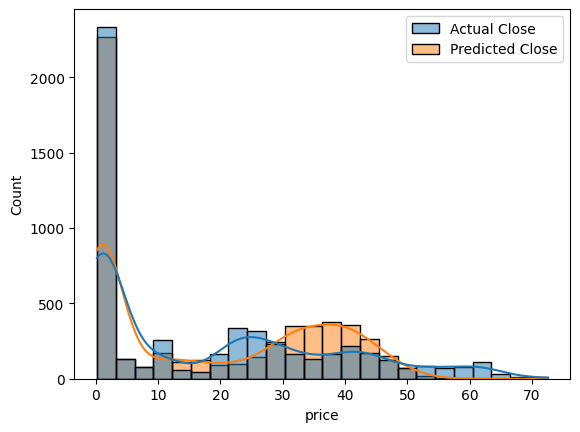

In [73]:
import seaborn as sns
sns.histplot(valid, kde= True)
plt.xlabel('price')